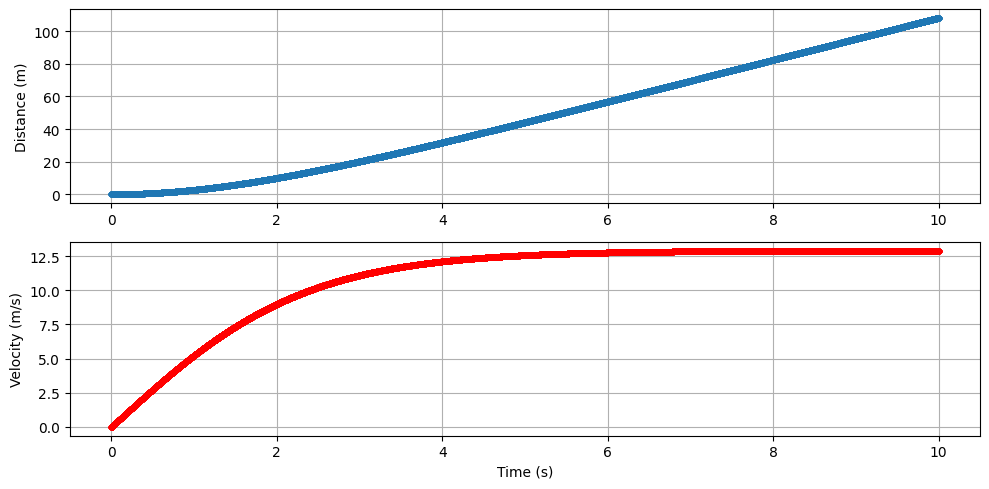

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import models as model

# --- model setup ---
model_params = {"mass": 180, "drag_coef": 6}
pointmass = model.DragPointMass(params=model_params)

initial_state = np.zeros(2)  # [s, v]

# --- simulation parameters ---
dt = 0.0001         # adjust freely, simulation stays consistent
t_final = 10.0        # total simulation time in seconds
n_steps = int(t_final / dt) + 1
time_vector = np.linspace(0, t_final, n_steps)

# --- control input (constant 1000 N force) ---
force_vector = 1000.0 * np.ones_like(time_vector)

# --- storage arrays ---
states = np.zeros((n_steps, 2))  # [s, v]
states[0] = initial_state

# --- integration loop ---
for k in range(1, n_steps):
    states[k] = pointmass.step_dt(
        state=states[k - 1],
        control=force_vector[k - 1],
        dt=dt
    )

# --- extract results ---
distance = states[:, 0]
velocity = states[:, 1]

# --- plot ---
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_vector, distance, marker='.')
plt.ylabel("Distance (m)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_vector, velocity, marker='.', color='r')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)

plt.tight_layout()
plt.show()
